## **Business Problem: A mobile advertising platform displays ads within various third-party apps. Advertisers pay the platform based on ad performance, often per click. To maximize its own revenue and the advertiser's ROI, the platform needs to predict the likelihood that a user will click on a given ad when it is displayed.**

In [168]:
import pandas as pd
ads_df=pd.read_csv('/content/Ad_Clicks.csv')
ads_df.info()
ads_df.head()
ads_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ad_format      3000 non-null   object
 1   ad_category    3000 non-null   object
 2   ad_creative    3000 non-null   object
 3   device_type    3000 non-null   object
 4   os_version     3000 non-null   object
 5   country        3000 non-null   object
 6   language       3000 non-null   object
 7   publisher_app  3000 non-null   object
 8   day_of_week    3000 non-null   object
 9   time_of_day    3000 non-null   object
 10  clicked        3000 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 257.9+ KB


,ad_format,ad_category,ad_creative,device_type,os_version,country,language,publisher_app,day_of_week,time_of_day,clicked
0,video,travel,creative_1,tablet,Android_12,JP,de,app_39,Thu,evening,0
1,banner,food,creative_1,smartphone,iOS_16,CN,es,app_45,Sun,afternoon,0
2,video,finance,creative_14,smartphone,Android_13,IN,en,app_26,Mon,afternoon,1
3,banner,food,creative_11,smartphone,iOS_16,DE,fr,app_24,Wed,afternoon,0
4,video,food,creative_16,smartphone,Android_11,DE,zh,app_2,Fri,evening,1
...,...,...,...,...,...,...,...,...,...,...,...
2995,video,travel,creative_1,smartphone,iOS_15,JP,pt,app_48,Sat,night,0
2996,video,gaming,creative_6,smartphone,iOS_15,JP,ja,app_14,Tue,morning,1
2997,banner,entertainment,creative_13,smartphone,Android_12,IN,de,app_3,Wed,night,1
2998,video,entertainment,creative_16,tablet,iOS_15,FR,ja,app_2,Fri,night,1


In [169]:
# Assign Y-Variable

Y = ads_df.clicked.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: clicked
Non-Null Count  Dtype   
--------------  -----   
3000 non-null   category
dtypes: category(1)
memory usage: 3.2 KB
None


In [172]:
# Independent or predictor variables

X_features = list( ads_df.columns )
X_features.remove('clicked')
X_features.remove('os_version')
X_features.remove('publisher_app')

print(X_features)

X =  ads_df[X_features]

['ad_format', 'ad_category', 'ad_creative', 'device_type', 'country', 'language', 'day_of_week', 'time_of_day']


In [173]:
# Data splitting into test data (30%) and trainig data (70%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.30,
random_state = 500)
print(y_train.info())

<class 'pandas.core.series.Series'>
Index: 2100 entries, 2857 to 2906
Series name: clicked
Non-Null Count  Dtype   
--------------  -----   
2100 non-null   category
dtypes: category(1)
memory usage: 18.6 KB
None


# Logit Model Buidling

In [174]:
# (One-hot coding) for categorical columns

categorical_columns = ['ad_format','ad_category','country', 'day_of_week', 'ad_creative', 'device_type', 'language', 'time_of_day']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)

X_train_encoded.info()

X_train_encoded.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 2857 to 2906
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ad_format_interstitial   2100 non-null   int64
 1   ad_format_video          2100 non-null   int64
 2   ad_category_finance      2100 non-null   int64
 3   ad_category_food         2100 non-null   int64
 4   ad_category_gaming       2100 non-null   int64
 5   ad_category_shopping     2100 non-null   int64
 6   ad_category_travel       2100 non-null   int64
 7   country_CN               2100 non-null   int64
 8   country_DE               2100 non-null   int64
 9   country_FR               2100 non-null   int64
 10  country_IN               2100 non-null   int64
 11  country_JP               2100 non-null   int64
 12  country_UK               2100 non-null   int64
 13  country_US               2100 non-null   int64
 14  day_of_week_Mon          2100 non-null   int64
 15  day_of

,ad_format_interstitial,ad_format_video,ad_category_finance,ad_category_food,ad_category_gaming,ad_category_shopping,ad_category_travel,country_CN,country_DE,country_FR,...,language_en,language_es,language_fr,language_hi,language_ja,language_pt,language_zh,time_of_day_evening,time_of_day_morning,time_of_day_night
2857,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2719,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2132,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
414,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1783,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


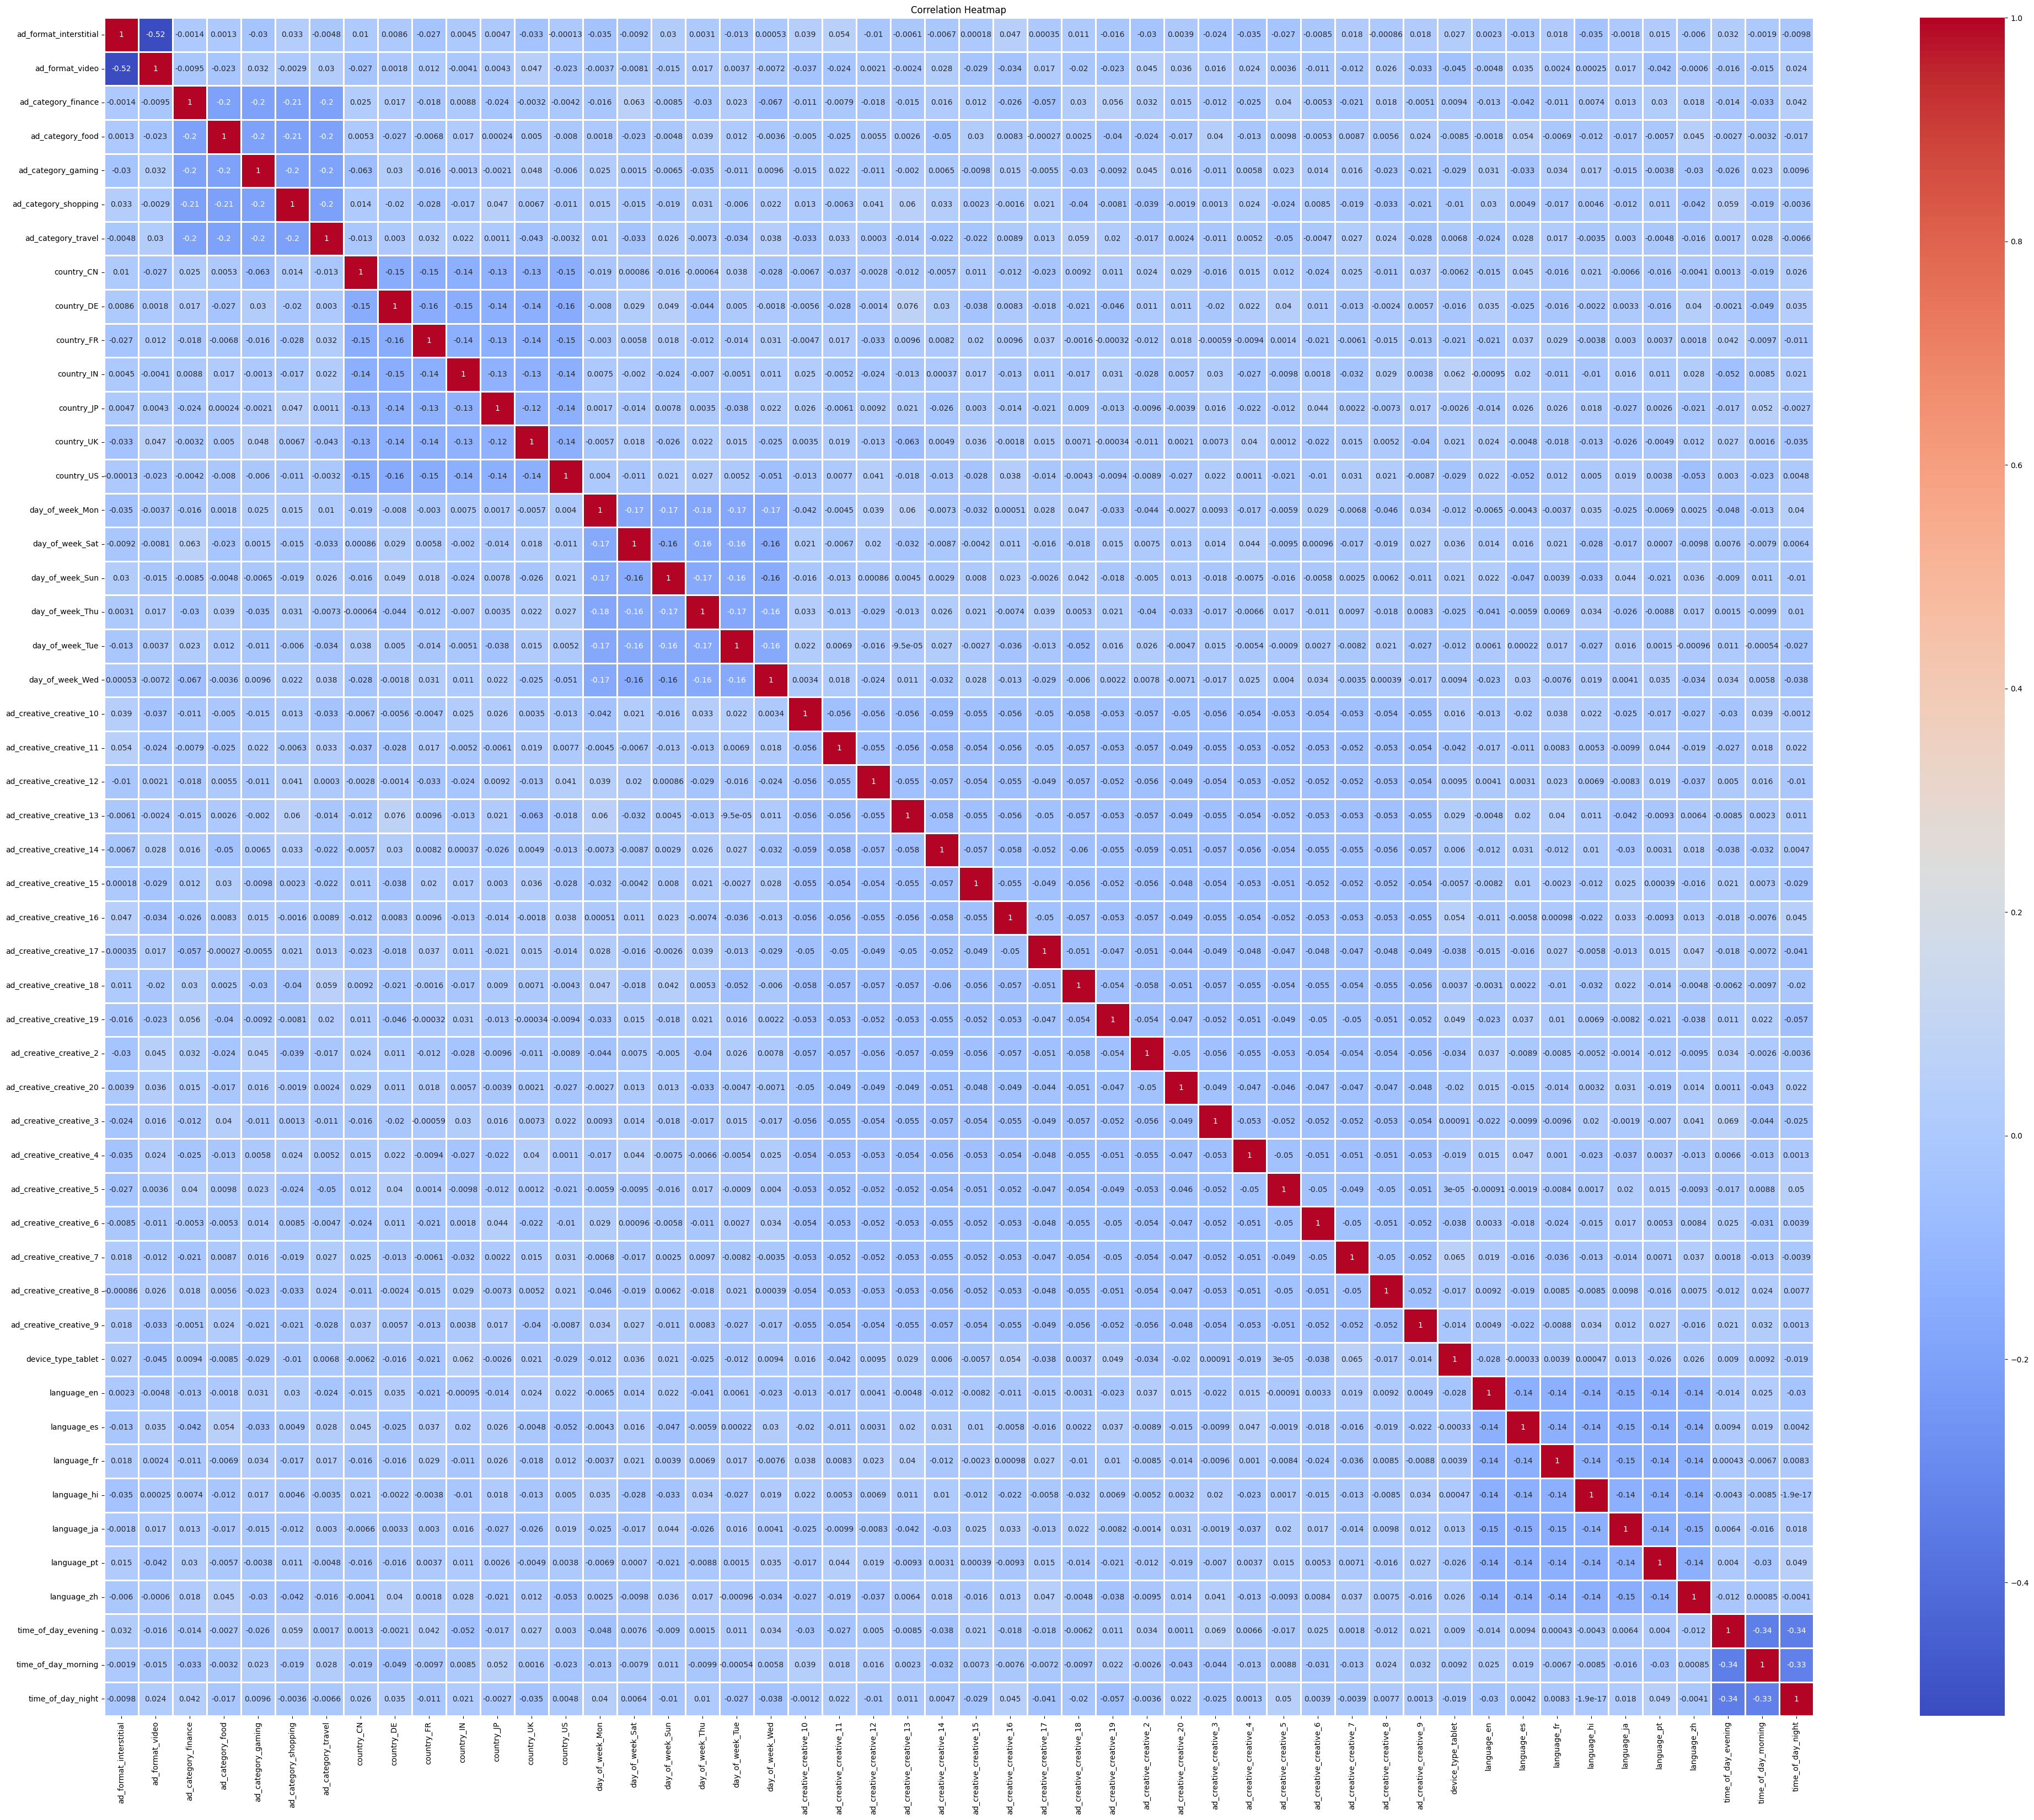

,ad_format_interstitial,ad_format_video,ad_category_finance,ad_category_food,ad_category_gaming,ad_category_shopping,ad_category_travel,country_CN,country_DE,country_FR,...,language_en,language_es,language_fr,language_hi,language_ja,language_pt,language_zh,time_of_day_evening,time_of_day_morning,time_of_day_night
ad_format_interstitial,1.000000,-0.519269,-0.001391,0.001277,-0.029753,0.032862,-0.004845,0.010279,0.008554,-0.027199,...,0.002302,-0.012937,0.018229,-3.491605e-02,-0.001832,0.014928,-0.006030,0.031827,-0.001915,-9.768784e-03
ad_format_video,-0.519269,1.000000,-0.009495,-0.023077,0.032256,-0.002948,0.030390,-0.027283,0.001753,0.011557,...,-0.004777,0.035091,0.002421,2.494960e-04,0.016521,-0.042202,-0.000603,-0.016197,-0.015097,2.398991e-02
ad_category_finance,-0.001391,-0.009495,1.000000,-0.200686,-0.199312,-0.205473,-0.199999,0.024665,0.016599,-0.018177,...,-0.013397,-0.042256,-0.010781,7.383758e-03,0.013310,0.029535,0.018092,-0.014349,-0.032746,4.200159e-02
ad_category_food,0.001277,-0.023077,-0.200686,1.000000,-0.199312,-0.205473,-0.199999,0.005322,-0.027414,-0.006810,...,-0.001771,0.054144,-0.006919,-1.225390e-02,-0.016818,-0.005692,0.044997,-0.002697,-0.003196,-1.694801e-02
ad_category_gaming,-0.029753,0.032256,-0.199312,-0.199312,1.000000,-0.204066,-0.198629,-0.062677,0.029807,-0.016274,...,0.031291,-0.032763,0.033786,1.720279e-02,-0.014892,-0.003816,-0.030071,-0.026016,0.023485,9.623367e-03
ad_category_shopping,0.032862,-0.002948,-0.205473,-0.205473,-0.204066,1.000000,-0.204770,0.013848,-0.019673,-0.028443,...,0.029796,0.004890,-0.017257,4.640375e-03,-0.012307,0.010993,-0.041852,0.058649,-0.019071,-3.627548e-03
ad_category_travel,-0.004845,0.030390,-0.199999,-0.199999,-0.198629,-0.204770,1.000000,-0.013089,0.002969,0.032144,...,-0.024117,0.028182,0.017258,-3.464136e-03,0.003016,-0.004756,-0.015565,0.001730,0.027885,-6.647006e-03
country_CN,0.010279,-0.027283,0.024665,0.005322,-0.062677,0.013848,-0.013089,1.000000,-0.152601,-0.145933,...,-0.014525,0.044973,-0.015563,2.078752e-02,-0.006608,-0.015797,-0.004067,0.001280,-0.019226,2.583390e-02
country_DE,0.008554,0.001753,0.016599,-0.027414,0.029807,-0.019673,0.002969,-0.152601,1.000000,-0.156911,...,0.034703,-0.025098,-0.016273,-2.189814e-03,0.003292,-0.015956,0.039759,-0.002118,-0.048909,3.476385e-02
country_FR,-0.027199,0.011557,-0.018177,-0.006810,-0.016274,-0.028443,0.032144,-0.145933,-0.156911,1.000000,...,-0.021135,0.037095,0.029158,-3.828468e-03,0.003035,0.003725,0.001804,0.042018,-0.009748,-1.142725e-02


In [175]:
## Removal of highly correlated columns

import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(50,40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=2.0)
plt.title('Correlation Heatmap')
plt.show()

corr_matrix

In [176]:
## Logit Model

import statsmodels.api as sm

X_train_encoded = sm.add_constant( X_train_encoded )
logit = sm.Logit(y_train, X_train_encoded)

logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.500190
         Iterations 6
                            Results: Logit
Model:                 Logit             Method:            MLE        
Dependent Variable:    clicked           Pseudo R-squared:  0.247      
Date:                  2025-09-03 21:49  AIC:               2202.7975  
No. Observations:      2100              BIC:               2490.9319  
Df Model:              50                Log-Likelihood:    -1050.4    
Df Residuals:          2049              LL-Null:           -1395.0    
Converged:             1.0000            LLR p-value:       2.9266e-113
No. Iterations:        6.0000            Scale:             1.0000     
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   -1.2001   0.3919 -3.0624 0.0022 -1.9682

In [177]:
##  Building the final logit model using only significant Variables

import statsmodels.api as sm

# Excluding variables with p-score higher than 0.05
insignificant_columns = ['ad_category_food', 'ad_category_travel','country_DE', 'country_UK', 'country_IN', 'country_JP', 'day_of_week_Mon', 'day_of_week_Sat', 'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue', 'day_of_week_Wed','ad_creative_creative_11', 'ad_creative_creative_12', 'ad_creative_creative_10', 'ad_creative_creative_6', 'ad_creative_creative_13', 'ad_creative_creative_14', 'ad_creative_creative_15', 'ad_creative_creative_16', 'ad_creative_creative_17', 'ad_creative_creative_18', 'ad_creative_creative_19', 'ad_creative_creative_2', 'ad_creative_creative_20', 'ad_creative_creative_3', 'ad_creative_creative_4', 'ad_creative_creative_5', 'ad_creative_creative_7', 'ad_creative_creative_9', 'language_en', 'language_es', 'language_fr', 'language_hi', 'language_ja', 'language_pt', 'language_zh']

X_train_final = X_train_encoded.drop(columns=insignificant_columns, axis=1)
X_test_final = X_test_encoded.drop(columns=insignificant_columns, axis=1)

final_logit = sm.Logit(y_train, X_train_final)

final_logit_model = final_logit.fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.515816
         Iterations 6
                            Results: Logit
Model:                Logit             Method:            MLE        
Dependent Variable:   clicked           Pseudo R-squared:  0.224      
Date:                 2025-09-03 21:49  AIC:               2194.4254  
No. Observations:     2100              BIC:               2273.5211  
Df Model:             13                Log-Likelihood:    -1083.2    
Df Residuals:         2086              LL-Null:           -1395.0    
Converged:            1.0000            LLR p-value:       7.0356e-125
No. Iterations:       6.0000            Scale:             1.0000     
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                  -1.2477   0.1609 -7.7542 0.0000 -1.5631 -0.9324
ad_

In [178]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
# Add constant to X_test_encoded
X_test_encoded = sm.add_constant( X_test_encoded )

# Exclude variables 'QtyRequired' and 'ITEM_NAME_OTHER' from the test set as well
X_test_final = X_test_encoded.drop(['ad_category_food', 'ad_category_travel','country_DE', 'country_UK', 'country_IN', 'country_JP', 'day_of_week_Mon', 'day_of_week_Sat', 'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue', 'day_of_week_Wed','ad_creative_creative_11', 'ad_creative_creative_12', 'ad_creative_creative_10', 'ad_creative_creative_6', 'ad_creative_creative_13', 'ad_creative_creative_14', 'ad_creative_creative_15', 'ad_creative_creative_16', 'ad_creative_creative_17', 'ad_creative_creative_18', 'ad_creative_creative_19', 'ad_creative_creative_2', 'ad_creative_creative_20', 'ad_creative_creative_3', 'ad_creative_creative_4', 'ad_creative_creative_5', 'ad_creative_creative_7', 'ad_creative_creative_9', 'language_en', 'language_es', 'language_fr', 'language_hi', 'language_ja', 'language_pt', 'language_zh'], axis=1)

# Predict probabilities on the test set
y_prob = final_logit_model.predict(X_test_final)

y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})

print(y_pred_df.head())

     actual_Y  predicted_prob
397         0        0.104525
159         0        0.364852
2771        0        0.122215
163         0        0.059276
488         0        0.833474


In [180]:
# Initial cut-off -0.5

y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

from sklearn.metrics import confusion_matrix

# Confusion matrix generation
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

     actual_Y  predicted_prob  predicted_Y
397         0        0.104525            0
159         0        0.364852            0
2771        0        0.122215            0
163         0        0.059276            0
488         0        0.833474            1
[[468 105]
 [138 189]]


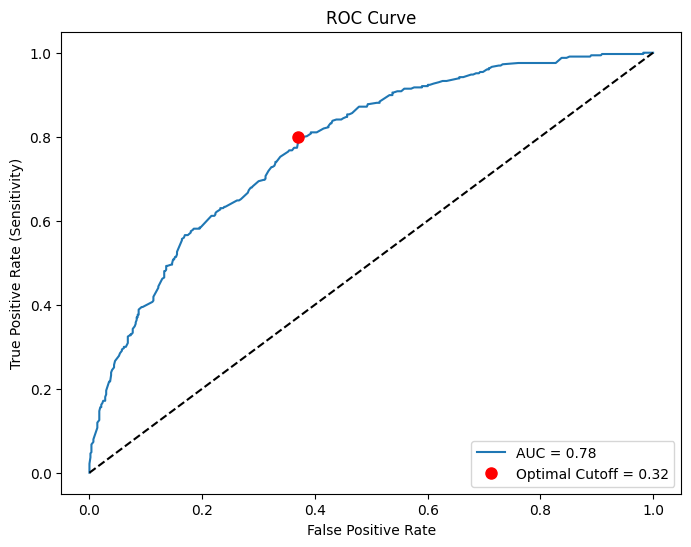

Optimal Cutoff: 0.32


In [182]:
# Generating ROC Curve to get optimal Cut-off

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Calculate AUC
auc = roc_auc_score(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Find the optimal cutoff using Youden's J statistic
# J = sensitivity + specificity - 1
# sensitivity = tpr
# specificity = 1 - fpr
J = tpr - fpr
optimal_cutoff_index = J.argmax()
optimal_cutoff = thresholds[optimal_cutoff_index]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Plot the optimal cutoff point
plt.plot(fpr[optimal_cutoff_index], tpr[optimal_cutoff_index], 'ro', markersize=8, label=f'Optimal Cutoff = {optimal_cutoff:.2f}')
plt.legend(loc='lower right')

plt.show()

print(f"Optimal Cutoff: {optimal_cutoff:.2f}")

## Confusion Matrix generation and interpretation

In [183]:
# Based on optimal cut-off from ROC curve = 0.32

y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.32 else 0)
print(y_pred_df.head())

from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

     actual_Y  predicted_prob  predicted_Y
397         0        0.104525            0
159         0        0.364852            1
2771        0        0.122215            0
163         0        0.059276            0
488         0        0.833474            1
[[361 212]
 [ 66 261]]


     actual_Y  predicted_prob  predicted_Y
397         0        0.104525            0
159         0        0.364852            1
2771        0        0.122215            0
163         0        0.059276            0
488         0        0.833474            1
[[361 212]
 [ 66 261]]


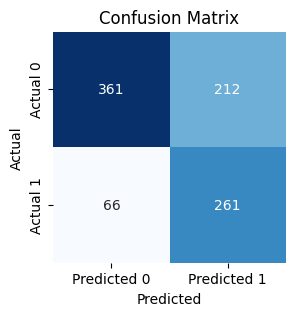


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       573
           1       0.55      0.80      0.65       327

    accuracy                           0.69       900
   macro avg       0.70      0.71      0.69       900
weighted avg       0.74      0.69      0.70       900



In [184]:
# Confusion Matrix Heat map (Cut-Off = 0.32)

y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= optimal_cutoff else 0)
print(y_pred_df.head())
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))

In [186]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy

from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))

Sensitivity (Recall): 0.80
Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       573
           1       0.55      0.80      0.65       327

    accuracy                           0.69       900
   macro avg       0.70      0.71      0.69       900
weighted avg       0.74      0.69      0.70       900



### **Now lets increase the sensitivity since it is more important for our model to reduce FALSE NEGATIVES in this case. We do not want the model to identify someone who actually clicks on the add as 'not clicked'.**

In [187]:
# Reducing Cut-off to increasing sensitivitye = 0.25

y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.20 else 0)
print(y_pred_df.head())

from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

     actual_Y  predicted_prob  predicted_Y
397         0        0.104525            0
159         0        0.364852            1
2771        0        0.122215            0
163         0        0.059276            0
488         0        0.833474            1
[[249 324]
 [ 28 299]]


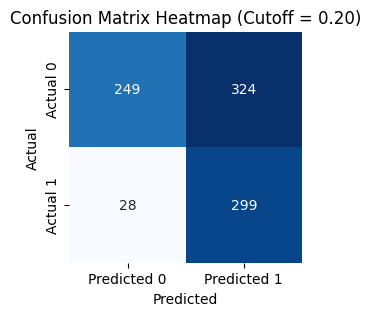

Sensitivity (Recall): 0.91
Accuracy: 0.61

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.43      0.59       573
           1       0.48      0.91      0.63       327

    accuracy                           0.61       900
   macro avg       0.69      0.67      0.61       900
weighted avg       0.75      0.61      0.60       900



In [188]:
# Confusion Matrix heatmap

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap (Cutoff = 0.20)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))